* Run on KERAS for LSTM, DL
* Code from Nam 
https://github.com/NamNguyen2015/TFM/blob/main/codes/TFM_Nam.ipynb?fbclid=IwAR164J-mRvMrTpCb96_Ag49VJ79a0MclimlEWLEzkd8te4jBHFJLDZZ7jZg

* cleaned data
https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Datas_cleaned/Brazil_Energy%20balance%20matrix_cleaned.xlsx?fbclid=IwAR10RWB5Cey70nSRzzVI5p78Tj3CUW6OxkX1eJXAfFiDooemH5bI3cOlSPY


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# I. About the dataset

We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

The calculations for data processing base on the **Manual Olade 2011**

## I.1 Load the dataset

In [2]:
# Load the file
file_path = 'Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)

for k in Dict.keys():       
    # Round the values of each column in dataframe with 2 decimals
    Dict[k]=Dict[k].applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    #Ignor the first row (unit) in each df
    Dict[k]=Dict[k][1:]
    
    #Rename of columns in df
    Dict[k].rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True)   
    
    # Remove space in column names and Sector names
    Dict[k].columns=Dict[k].columns.str.strip()
    Dict[k].SECTOR=Dict[k].SECTOR.str.strip()
  
        
    
    
print(Dict.keys())

# Convert the keys of Dict to only contain the year
for k in list(Dict.keys()):
    k_new = k.split(' - ')[0]
    Dict[k_new] = Dict.pop(k)
    
    Dict[k_new]["Year"]=k_new
        
print('\n')
print(Dict.keys())



FileNotFoundError: [Errno 2] No such file or directory: 'Brazil_Energy balance matrix.xlsx'

In [ ]:
df_2021=Dict['2021']

In [ ]:
df_2021.columns  

#LPG stands for Liquefied Petroleum Gas

## I.2 Frist visualization of energy balance (Supply-Transformation-Consumption)

In [5]:
Dict1=Dict.copy()

for k in Dict1.keys():
    selected_columns = ['SECTOR', 'TOTAL PRIMARIES', 'TOTAL SECUNDARIES', 'TOTAL','Year']
    Dict1[k]=Dict1[k][selected_columns]
    selected_rows=['TOTAL SUPPLY','TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict1[k]=Dict1[k][Dict1[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict1.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    
# Get the df "TOTAL SUPPLY"

df_TS=df_conc.loc[df_conc["SECTOR"]=="TOTAL SUPPLY"].drop(columns=["SECTOR"], axis=1)



df_TT=df_conc.loc[df_conc["SECTOR"]=="TOTAL TRANSFORMATION"].drop(columns=["SECTOR"], axis=1)


# Get the df "FINAL CONSUMPTION"

df_TC=df_conc.loc[df_conc["SECTOR"]=="FINAL CONSUMPTION"].drop(columns=["SECTOR"], axis=1)



df_TS.head()

,TOTAL PRIMARIES,TOTAL SECUNDARIES,TOTAL
Year,,,
1970,67176.64,30633.82,66742.4
1971,69391.7,34509.96,70092.03
1972,76197.42,38477.46,75111.33
1973,83252.49,45191.03,81963.44
1974,87620.68,50406.2,87628.2


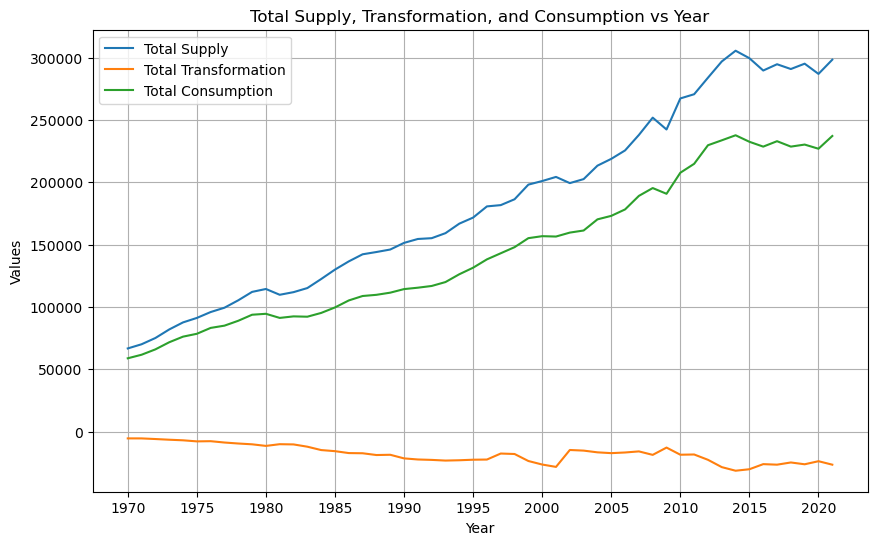

In [6]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', label='Total Supply', ax=ax)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', label='Total Transformation', ax=ax)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', label='Total Consumption', ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Total Supply, Transformation, and Consumption vs Year')
ax.set_xticks(df_TS.index[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

## I.3 SUPPLY

### I.3.1. Preview the Total Supply of Primary Sources

The primary sources include: **'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY'**

In [7]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS1 = df_TS1.apply(lambda column: column.fillna(0))
    
df_TS1.head()


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,25664.25,180.02,2235.39,3421.52,0,0.0,31851.53,3600.70,223.24,67176.64
1971,27222.25,279.11,2294.86,3713.63,0,0.0,31807.22,3841.81,232.82,69391.70
1972,32473.41,313.00,2311.25,4356.82,0,0.0,32143.13,4298.39,301.43,76197.42
1973,38778.41,358.06,2287.08,4976.55,0,0.0,31897.40,4644.41,310.58,83252.49
1974,41479.10,544.45,2384.82,5646.13,0,0.0,32598.64,4618.65,348.89,87620.68


In [8]:
# Check if any columns have negative values
def negative_values(df):
    columns_with_negative_values = df.columns[df.lt(0).any()]
    # Count the number of negative values in each column
    negative_values_count = df.lt(0).sum()

    # Print the columns with negative values (if any)
    if not columns_with_negative_values.empty:
        print("Columns with negative values:")
        print(columns_with_negative_values)
        # Print the count of negative values in each column
        print("Number of negative values in each column:")
        print(negative_values_count)
    else:
        print("No columns have negative values.")
        
negative_values(df_TS1)

Columns with negative values:
Index(['NUCLEAR'], dtype='object')
Number of negative values in each column:
OIL                       0
NATURAL GAS               0
COAL                      0
HYDROENERGY               0
GEOTHERMAL                0
NUCLEAR                   1
FIREWOOD                  0
SUGARCANE AND PRODUCTS    0
OTHER PRIMARY             0
TOTAL PRIMARIES           0
dtype: int64


<Figure size 1000x600 with 0 Axes>

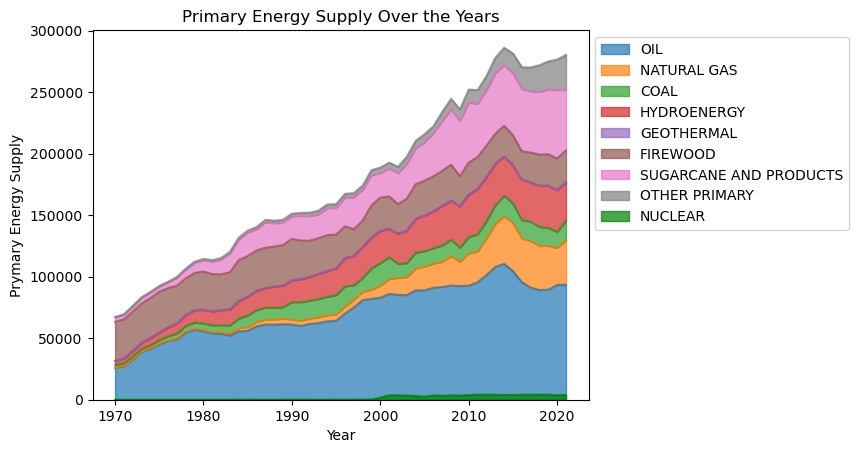

In [9]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Separate the positive and negative parts of the 'NUCLEAR' column
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()

# Plot the stack plot for positive and negative parts separately
plt.figure(figsize=(10, 6))  # Set the figure size if needed
ax = df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7)
positive_nuclear.plot(kind='area', ax=ax, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax, color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Prymary Energy Supply')
plt.title('Primary Energy Supply Over the Years')

# Move the legend directly to the figure
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

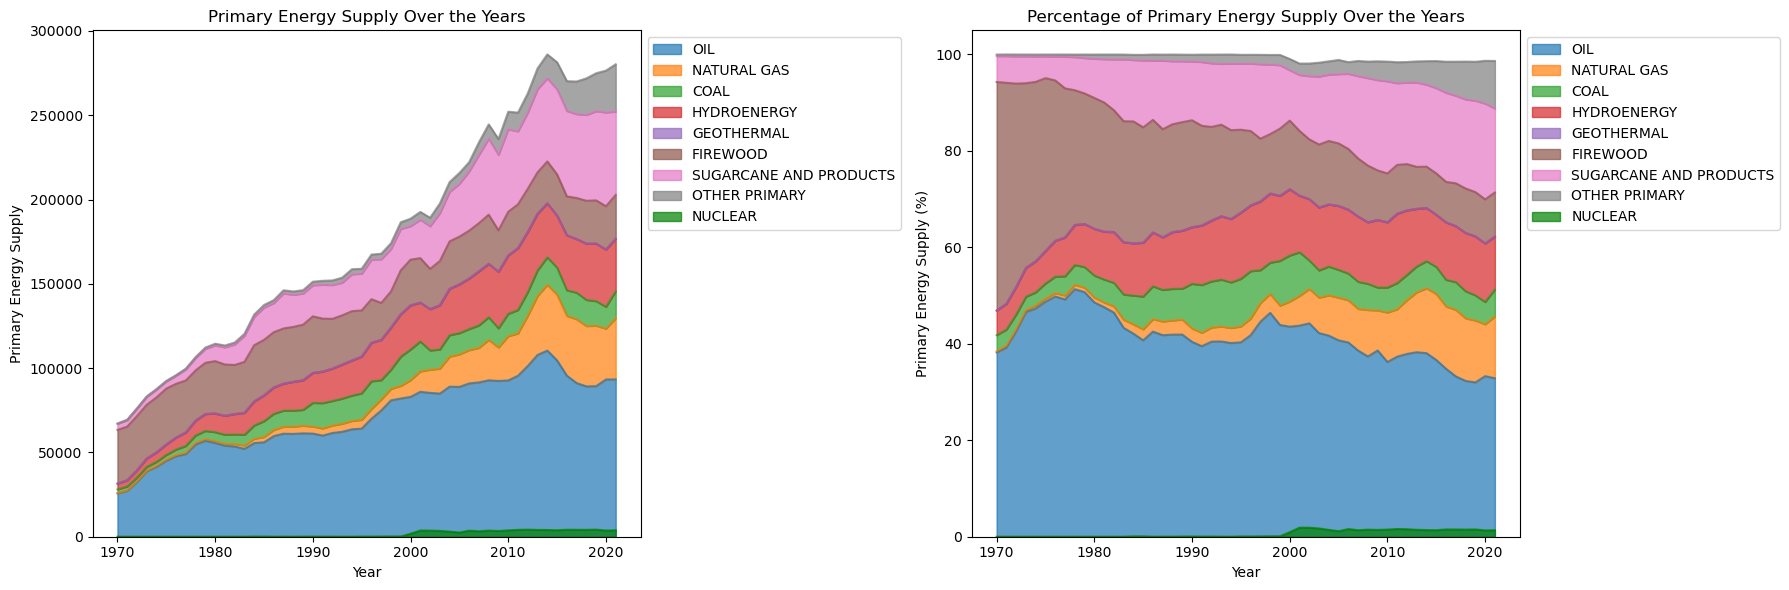

In [10]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns = ['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY']
df_TS1_percentages = (df_stackplot[percentage_columns].div(df_TS1['TOTAL PRIMARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First stack plot for Primary Energy Supply
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
#negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()
df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax1)#drop(columns='NUCLEAR').
positive_nuclear.plot(kind='area', ax=ax1, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax1, color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Supply')
ax1.set_title('Primary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Second stack plot for Percentage of Primary Energy Supply
positive_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(lower=0)
#negative_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(upper=0).abs()
df_TS1_percentages.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax2)
positive_nuclear_percent.plot(kind='area', ax=ax2, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear_percent.plot(kind='area', ax=ax2, color='red', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Primary Energy Supply (%)')
ax2.set_title('Percentage of Primary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [11]:
df_2021.SECTOR

1                                PRODUCTION
2                                    IMPORT
3                                    EXPORT
4                              STOCK CHANGE
5                                    UNUSED
6                              TOTAL SUPPLY
7                                REFINERIES
8                              POWER PLANTS
9                            SELF-PRODUCERS
10                               GAS PLANTS
11                          CHARCOAL PLANTS
12    COKE PLANTS AND BLAST FURNACES_x000d_
13                             DISTILLERIES
14                            OTHER CENTERS
15                     TOTAL TRANSFORMATION
16                          OWN CONSUMPTION
17                                   LOSSES
18                               ADJUSTMENT
19                                TRANSPORT
20                               INDUSTRIAL
21                              RESIDENTIAL
22             COMMERCIAL, SERVICES, PUBLIC
23          AGRICULTURE, FISHING

In [12]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['IMPORT', 'EXPORT']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_IMP_EXP=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_IMP_EXP = df_IMP_EXP.apply(lambda column: column.fillna(0))
    
df_IMP_EXP.head(5)


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,17845.05,0.0,1358.47,0,0,0.0,0.0,0,0,19203.53
1970,65.05,0.0,0.00,0,0,0.0,0.0,0,0,65.05
1971,20434.56,0.0,1155.91,0,0,0.0,0.0,0,0,21590.47
1971,766.34,0.0,0.00,0,0,0.0,0.0,0,0,766.34
1972,25706.19,0.0,1283.81,0,0,0.0,0.0,0,0,26990.00


### I.3.2 Preview of the Total Supply of secondary energy sources

The secondary energy ensources include: **'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY'**

In [13]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR',  'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY', 'TOTAL SECUNDARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS2=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS2 = df_TS2.apply(lambda column: column.fillna(0))
    
df_TS2.head()

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
       'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
       'OTHER SECONDARY', 'NON-ENERGY']
df_TS2_percentages = (df_TS2[percentage_columns_2].div(df_TS2['TOTAL SECUNDARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [14]:
negative_values(df_TS2)

No columns have negative values.


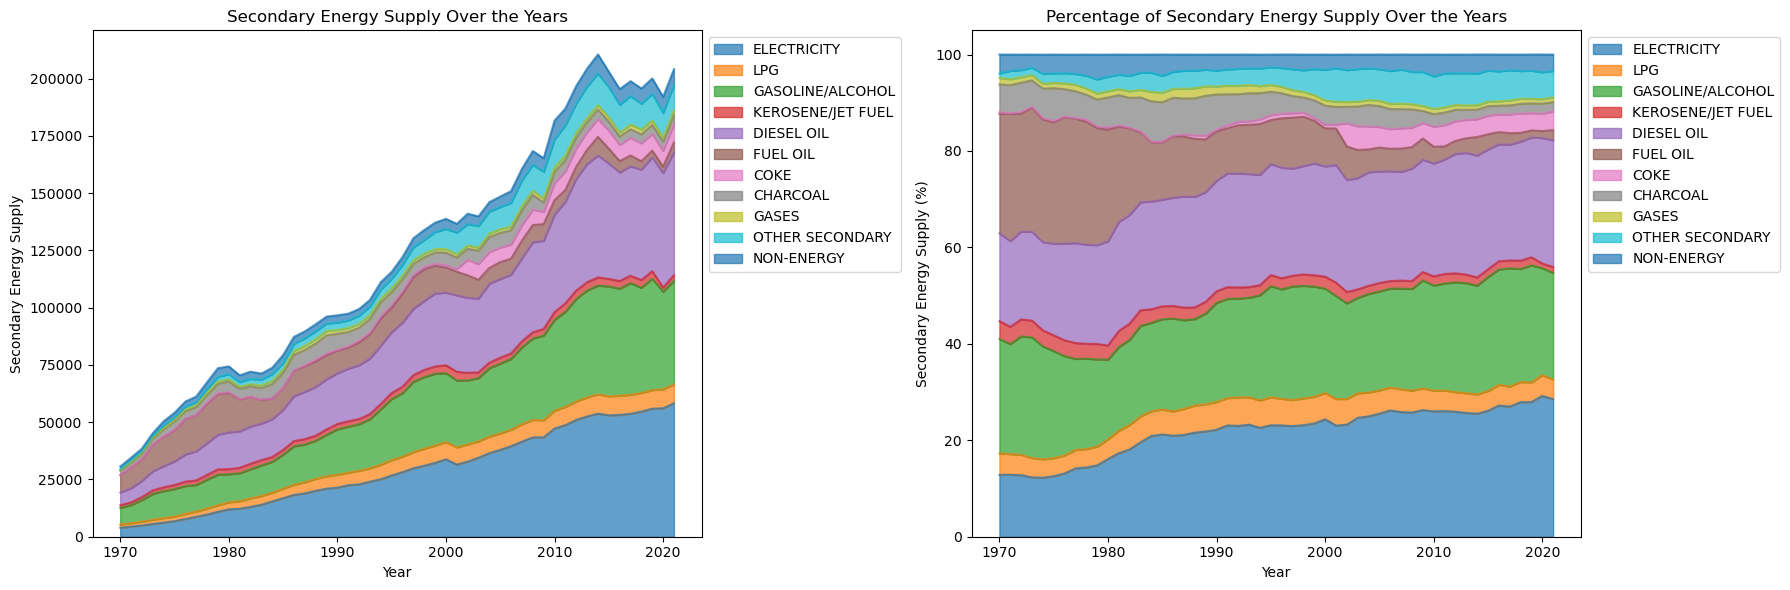

In [15]:
# Drop the 'TOTAL SECUNDARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS2.drop(columns="TOTAL SECUNDARIES")
# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Secondary Energy Supply')
ax1.set_title('Secondary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_TS2_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Secondary Energy Supply (%)')
ax2.set_title('Percentage of Secondary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

## I.4 CONSUMPTION




**Antonio's notes:**

Pronosticar y analizar consumos energéticos:

 -Balance Eurostat
 
 -Balance España
 
Desagregar el consumo por destino

Evolución de los consumos:

 -Patrón
 
 -Correlaciones
 
 -Tipos de consumo
 
 -Relación entre Incremento económico (ciclos económicos de crecimiento)
 
                          Incremento consumo energético
                          
Análisis integrado con todos los consumos y ver si el abastecimiento, es decir, la oferta.

Validar los "nan" de cada fuente primaria de Brasil

Evaluar la industrialización de Brasil a futuro para ver como va a influir en su consumo

¿Es exportador de energía Brasil?

Pérdidas de energía eléctrica por distribución

Capacidad operativa de energía hidroeléctrica por las capacidades hídricas de los ríos


**Edu's notes:**

Entiendo que nos dice que hay que que ver la evolución del consumo en cuanto a los suministros

Relación oferta y demanda por segmentos en las series temporales

De esa forma también podriamos ver la correlación entre las variables (positivas/negativas) en estas series temporales que en Brasil han influido en la demanda/oferta en los diferentes segementos en las series temporales y así se veria la evolución

En cuanto a los escenarios, no se como plantearlos, se me ocurre algo pero necesito vuestra opinión:

Escenario con un aumento o disminución de la población lo que reflejaría un cambio en el consumo final energético.

Escenario con un aumento o disminución de la economía brasileña y su impacto en el consumo final energético.

Escenario de un desarrollo tecnológico que muestre su impacto en el consumo final energético

In [16]:
df_2021

,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
1,PRODUCTION,152713.43,26371.48,2633.08,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,41972.43,16109.25,6866.86,3915.43,2060.14,9109.18,5630.96,189790.51,320203.76,2021
2,IMPORT,7359.21,14796.23,13216.31,NaN,NaN,NaN,NaN,NaN,NaN,...,12211.92,581.74,1150.16,NaN,NaN,2901.18,1712.36,31674.9,67046.66,2021
3,EXPORT,65724.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,499.3,11963.08,NaN,NaN,NaN,841.83,385.76,17331.46,83055.53,2021
4,STOCK CHANGE,-1007.78,-3598.93,67.82,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.66,-431.71,-92.5,NaN,NaN,-25.31,-8.2,-35.62,-4574.51,2021
5,UNUSED,NaN,1217.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1217.87,2021
6,TOTAL SUPPLY,93340.78,36350.92,15917.21,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,53662.39,4296.2,7924.52,3915.43,2060.14,11143.23,6949.36,204098.32,298402.5,2021
7,REFINERIES,-92551.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36249.21,16109.25,NaN,NaN,NaN,7528.3,4710.47,95389.98,2838.23,2021
8,POWER PLANTS,NaN,-13219.0,-4189.67,-29752.22,NaN,-3835.75,-56.11,NaN,-7138.42,...,-1371.21,-1656.49,NaN,NaN,NaN,-75.3,NaN,46508.5,-14785.66,2021
9,SELF-PRODUCERS,NaN,-4266.04,-215.78,-1372.79,NaN,NaN,-373.38,-5782.78,-5688.41,...,-561.98,-225.32,NaN,NaN,-394.47,-551.3,NaN,9776.97,-9655.28,2021
10,GAS PLANTS,NaN,-2583.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,920.49,2354.08,-229.54,2021


In [17]:
df_2021.SECTOR.unique()

array(['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY', 'REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
       'GAS PLANTS', 'CHARCOAL PLANTS',
       'COKE PLANTS AND BLAST FURNACES_x000d_', 'DISTILLERIES',
       'OTHER CENTERS', 'TOTAL TRANSFORMATION', 'OWN CONSUMPTION',
       'LOSSES', 'ADJUSTMENT', 'TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'ENERGY CONSUMPTION',
       'NON-ENERGY CONSUMPTION', 'FINAL CONSUMPTION'], dtype=object)

In [18]:
Dict2=Dict.copy()

for k in Dict2.keys():
   # selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
    #   'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    selected_columns = ['SECTOR','TOTAL','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','ENERGY CONSUMPTION', 'FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    #df_TC1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TC1 = df_conc.apply(lambda column: column.fillna(0))
    
df_TC1.tail(10)

,SECTOR,TOTAL
Year,,
2020,FINAL CONSUMPTION,226959.77
2021,TRANSPORT,85176.10
2021,INDUSTRIAL,82389.66
2021,RESIDENTIAL,28421.75
2021,"COMMERCIAL, SERVICES, PUBLIC",12548.34
2021,"AGRICULTURE, FISHING AND MINING",15421.69
2021,CONSTRUCTION AND OTHERS,0.00
2021,ENERGY CONSUMPTION,223957.54
2021,NON-ENERGY CONSUMPTION,13236.97


In [19]:
# Group by Year and SECTOR, and sum the TOTAL values
grouped_df = df_TC1.groupby(['Year', 'SECTOR'])['TOTAL'].sum().reset_index()

grouped_df.tail(6)

# Pivot the data
pivot_df = grouped_df.pivot(index='Year', columns='SECTOR', values='TOTAL')


# Display the result
pivot_df.tail()



SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,ENERGY CONSUMPTION,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,,,
2017,14947.62,12453.69,0.0,217970.64,233004.63,82334.45,15033.99,25356.57,82878.31
2018,15092.95,12678.81,0.0,214547.45,228665.38,78167.81,14117.93,26377.98,82229.91
2019,15123.66,13113.50,0.0,216058.03,230298.05,76310.71,14240.02,26589.02,84921.14
2020,15168.99,12027.15,0.0,214403.72,226959.77,79593.61,12556.05,28199.70,79414.26
2021,15421.69,12548.34,0.0,223957.54,237194.52,82389.66,13236.97,28421.75,85176.10


In [20]:
# Dataframe Energy Consumption (EC)
df_EC=pivot_df.drop(columns=['ENERGY CONSUMPTION'])
df_EC.head()

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,,
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68


In [21]:
# Drop the 'FINAL CONSUMPTION' column and calculate the percentages
df_percentages = (df_EC.drop(columns=['FINAL CONSUMPTION']).div(df_EC['FINAL CONSUMPTION'], axis=0) * 100)
df_percentages = df_percentages.round(0)

df_percentages.tail(20)

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,
2002,5.0,5.0,0.0,41.0,5.0,13.0,31.0
2003,5.0,5.0,0.0,42.0,5.0,13.0,29.0
2004,6.0,5.0,0.0,41.0,5.0,13.0,30.0
2005,7.0,5.0,0.0,41.0,5.0,13.0,30.0
2006,6.0,5.0,0.0,41.0,5.0,12.0,30.0
2007,7.0,5.0,0.0,41.0,5.0,12.0,30.0
2008,7.0,5.0,0.0,40.0,4.0,12.0,32.0
2009,6.0,5.0,0.0,39.0,5.0,12.0,33.0
2010,6.0,5.0,0.0,40.0,5.0,11.0,33.0


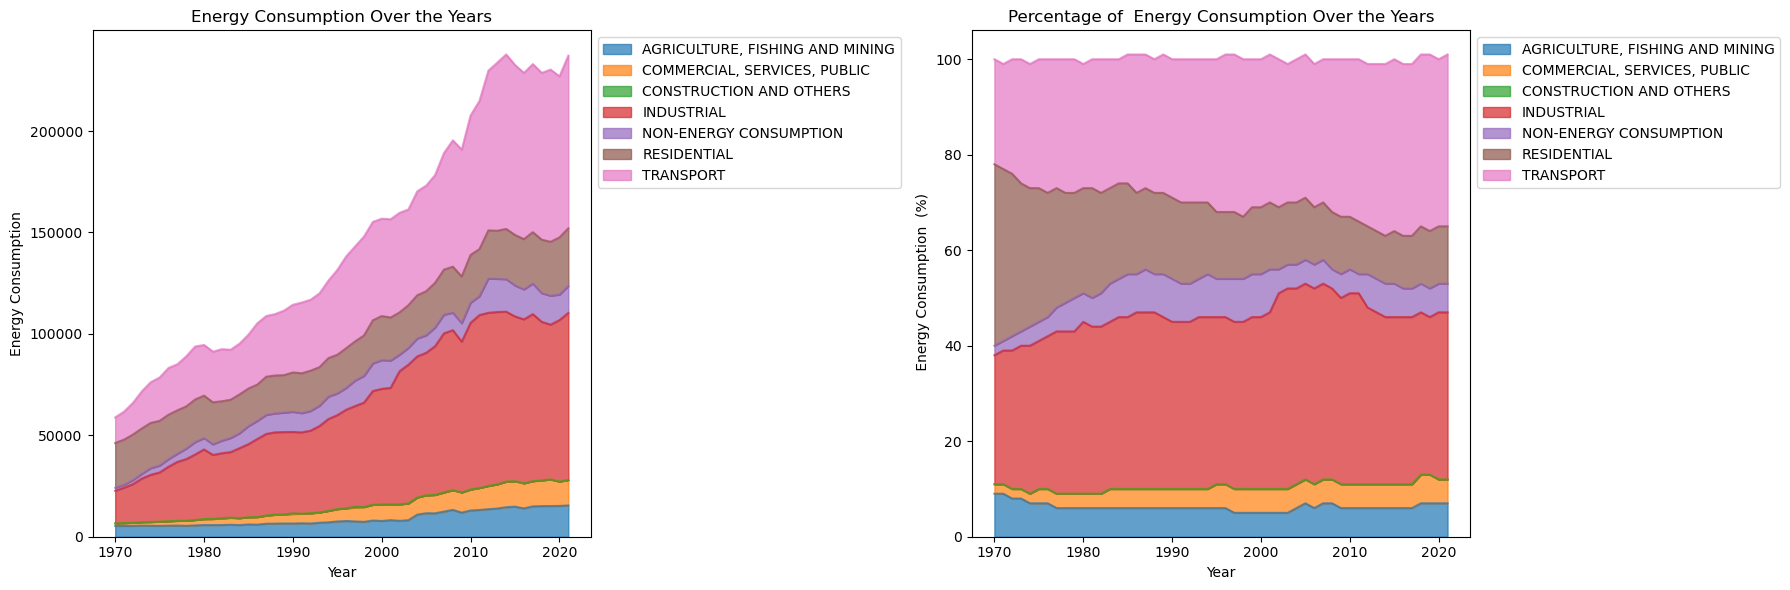

In [22]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_EC.drop(columns=["FINAL CONSUMPTION"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

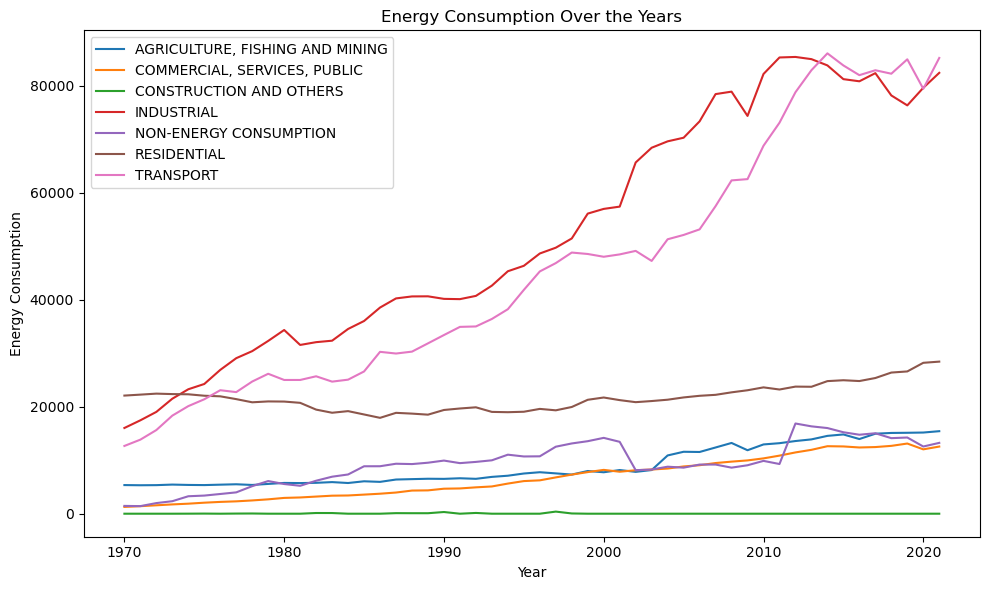

In [23]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [24]:

list_correlacion=data.columns

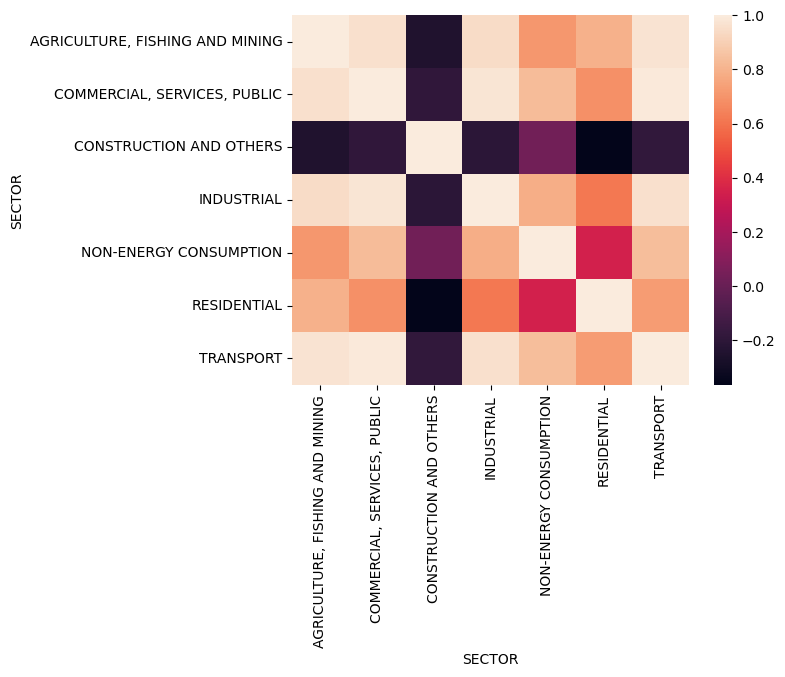

In [25]:
df_correlacion = data[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

AGRICULTURE, FISHING AND MINING


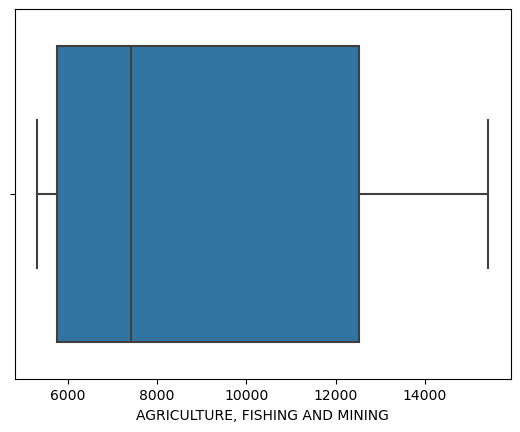

COMMERCIAL, SERVICES, PUBLIC


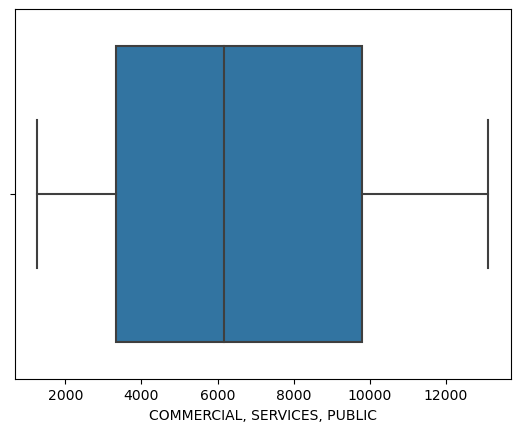

CONSTRUCTION AND OTHERS


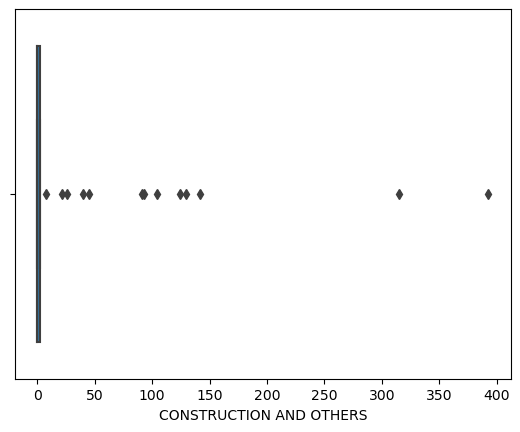

INDUSTRIAL


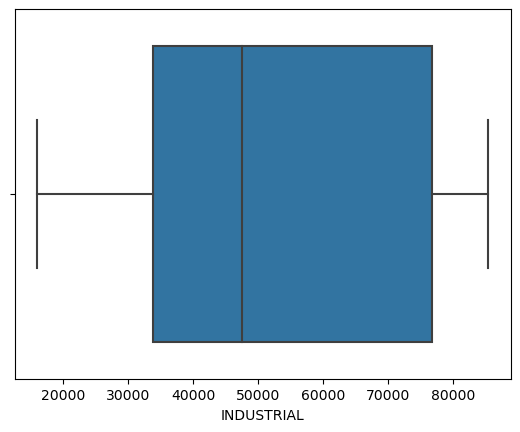

NON-ENERGY CONSUMPTION


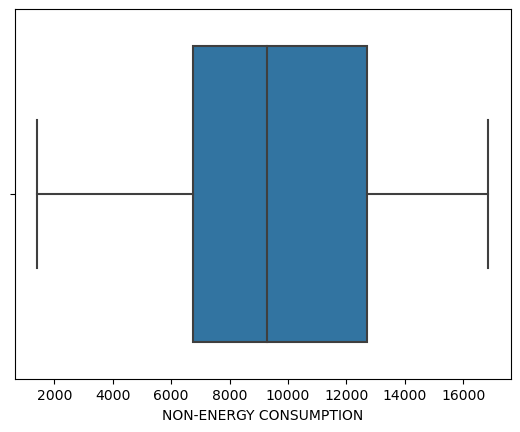

RESIDENTIAL


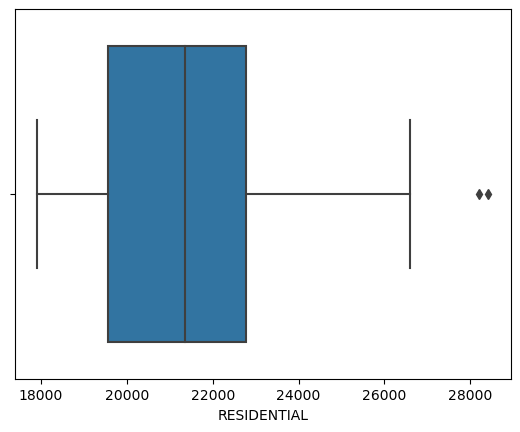

TRANSPORT


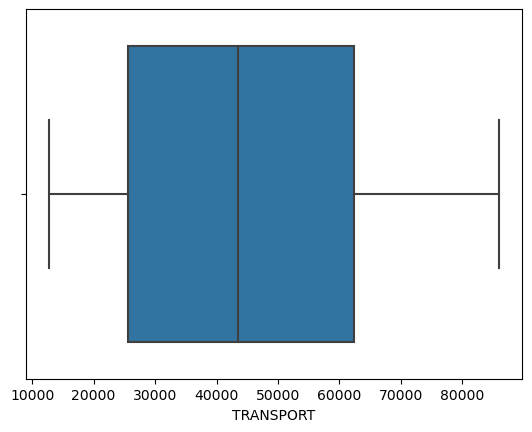

In [26]:
for i in list_correlacion:
    sns.boxplot(x=data[i])
    print(i)
    plt.show()

In [27]:
def saca_metricas(y_real, y_pred): 
    false_positive_rate, recall, thresholds = roc_curve(y_real, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    print('- AUC: {roc_auc}')
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [28]:
#models_rcv = {
 #   "XGB": XGBClassifier(n_jobs=-1, n_estimators=30, random_state=1234),
  #  "RF": RandomForestClassifier(n_estimators =30, n_jobs=-1, random_state=1234),
  #  "Tree": DecisionTreeClassifier(random_state=1234),
  #  "Log": LogisticRegression(solver="newton-cg", penalty="l2"),
#}

def rskf_comparison(models, X_train, y_train):
    
    results = []
    names = []

    for k, v in models.items():
    
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234) 
        cv_scores = cross_val_score(v, X_train, y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')
        
    
    return(results, names)


#results, names = rskf_comparison(models_rcv, X_train, y_train)
#plt.figure(figsize=(10, 6))
#comparison = plt.boxplot(results)
#plt.xticks(np.arange(1,len(names)+1),names)
#plt.show(comparison)

In [29]:
#grid_param = {
#    'n_estimators': [100,300,500],
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [16,20,22,24],
#    'max_features': ['auto', 'sqrt'],

#}

When dealing with time series prediction problems, some **suitable models** are :

Autoregressive Integrated Moving Average (ARIMA)

Seasonal Autoregressive Integrated Moving-Average (SARIMA):

Seasonal Decomposition of Time Series (STL)

Exponential Smoothing (ETS)

Long Short-Term Memory (LSTM)

Gated Recurrent Units (GRU)

Convolutional Neural Networks (CNNs)

**Here's a high-level outline of how you might approach creating such a pipeline:**

### 1. Data Preparation:

Load and preprocess your time series data.
Convert the target variable to numerical values if needed.
### 2. Model Selection:

Define a list of time series forecasting models you want to consider (ARIMA, SARIMA, STL, ETS, LSTM, GRU, CNNs).
Define hyperparameters for each model, if applicable.

### 3. Pipeline Creation:

For each model in the list, create a separate pipeline that includes data preprocessing, model fitting, and prediction.

### 4.Model Evaluation:

Use appropriate time series evaluation metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error) to evaluate the performance of each model on a validation set.

### 5. Model Selection:

Compare the performance metrics of each model to identify the best-performing model.
Select the model with the lowest error or the best fit for your problem.

### 6. Fine-Tuning and Validation:

If needed, perform hyperparameter tuning on the selected model using techniques like grid search or random search.
Validate the tuned model on a separate test set to ensure its generalization performance.

### 7. Final Model and Deployment:

Once you have identified the best model, train it on the entire dataset (including training and validation data).
Deploy the final model for making predictions on new data.

### 1. Data Preparation:

In [30]:
#Load data of economy
economic_demographic_data = pd.read_excel('Brasil_indices.xlsx', index_col='Año')

cols=economic_demographic_data.columns
print(cols)

Index(['Población', 'PIB', 'Crecimiento población anual', 'Tasa de natalidad',
       'Tasas de muerte/1000 personas', 'Consumo per capita energetico',
       'tasa de crecimiento', 'Peso Petróleo', 'Peso Natural gas', 'Peso Coal',
       'Peso Hydroenergy', 'Nuclear', 'Firewood', 'Sugarcane and products',
       'Otros', 'TOTAL', ' Penet_energ_renovable', 'Huella_carbono'],
      dtype='object')


In [31]:
economic_demographic_data.shape

(60, 18)

In [32]:
economic_demographic_data.tail(20)

,Población,PIB,Crecimiento población anual,Tasa de natalidad,Tasas de muerte/1000 personas,Consumo per capita energetico,tasa de crecimiento,Peso Petróleo,Peso Natural gas,Peso Coal,Peso Hydroenergy,Nuclear,Firewood,Sugarcane and products,Otros,TOTAL,Penet_energ_renovable,Huella_carbono
Año,,,,,,,,,,,,,,,,,,
2009.0,194517549,1.666996e+12,0.009577,1.825,6.155,0.001246,-0.046851,0.386206,0.082977,0.047515,0.140196,0.014114,0.102606,0.187328,0.039059,1.0,0.242802,0.757198
2010.0,196353492,2.208838e+12,0.009438,1.810,6.199,0.001361,0.092507,0.362333,0.102623,0.051759,0.135213,0.014772,0.101352,0.191108,0.040841,1.0,0.236565,0.763435
2011.0,198185302,2.616157e+12,0.009329,1.800,6.283,0.001366,0.003236,0.373426,0.098293,0.054285,0.143714,0.015961,0.101423,0.169394,0.043504,1.0,0.245137,0.754863
2012.0,199977707,2.465228e+12,0.009044,1.767,6.340,0.001420,0.039572,0.379069,0.111605,0.052179,0.133768,0.015645,0.095970,0.169036,0.042729,1.0,0.229738,0.770262
2013.0,201721767,2.472819e+12,0.008721,1.748,6.310,0.001472,0.036873,0.382572,0.124229,0.053649,0.119365,0.014285,0.087065,0.175106,0.043729,1.0,0.206429,0.793571
2014.0,203459650,2.456044e+12,0.008615,1.767,6.272,0.001502,0.020212,0.380614,0.134485,0.056161,0.110406,0.013815,0.085734,0.169869,0.048915,1.0,0.196140,0.803860
2015.0,205188205,1.802212e+12,0.008496,1.777,6.433,0.001460,-0.027938,0.366533,0.136826,0.056116,0.108165,0.013461,0.085737,0.176943,0.056219,1.0,0.193902,0.806098
2016.0,206859578,1.795693e+12,0.008146,1.709,6.538,0.001400,-0.040766,0.348151,0.129313,0.055160,0.119096,0.015068,0.083964,0.184806,0.064442,1.0,0.203060,0.796940
2017.0,208504960,2.063515e+12,0.007954,1.736,6.493,0.001414,0.009362,0.332412,0.138044,0.057516,0.116065,0.014962,0.088868,0.181554,0.070579,1.0,0.204934,0.795066


In [33]:
selected_cols=cols[:6]

In [34]:
df1=economic_demographic_data[selected_cols]

In [35]:
data=df_EC
#Merge data
merged_df = data.merge(df1, left_index=True, right_index=True)

# Convertir el índice a tipo entero 
merged_df.index = merged_df.index.astype(int)
# Imprimir el DataFrame unido para verificar
merged_df.columns

Index(['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC',
       'CONSTRUCTION AND OTHERS', 'FINAL CONSUMPTION', 'INDUSTRIAL',
       'NON-ENERGY CONSUMPTION', 'RESIDENTIAL', 'TRANSPORT', 'Población',
       'PIB', 'Crecimiento población anual', 'Tasa de natalidad',
       'Tasas de muerte/1000 personas', 'Consumo per capita energetico'],
      dtype='object')

In [36]:
#Convert cols to English
merged_df.rename(columns={'Población':'POPULATION','PIB': 'GDP',
                          'Crecimiento población anual': 'ANNUAL POPULATION GROWTH',
                          'Tasa de natalidad': 'BIRTH RATE',
                          #'Tasa inflacion': 'INFLATION RATE',
                          'Tasas de muerte/1000 personas': 'DEATH RATES PER 1000 PEOPLE'}, inplace=True)

In [37]:
merged_df.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99,96369875,4.232766e+10,0.025207,4.972,10.820,0.000693
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87,98766288,4.886983e+10,0.024867,4.857,10.595,0.000710
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22,101194394,5.843486e+10,0.024584,4.746,10.367,0.000742
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90,103666904,8.359228e+10,0.024433,4.646,10.157,0.000791
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68,106167372,1.097945e+11,0.024120,4.502,9.954,0.000825


In [38]:
SECTORS=['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC', 'INDUSTRIAL', 'NON-ENERGY CONSUMPTION',
       'RESIDENTIAL', 'TRANSPORT', 'FINAL CONSUMPTION']

In [39]:
FEATURES=['POPULATION',
       'GDP', 'ANNUAL POPULATION GROWTH', 'BIRTH RATE', #'INFLATION RATE',
       'DEATH RATES PER 1000 PEOPLE']


missing_values=merged_df.isnull().sum()
missing_values

AGRICULTURE, FISHING AND MINING    0
COMMERCIAL, SERVICES, PUBLIC       0
CONSTRUCTION AND OTHERS            0
FINAL CONSUMPTION                  0
INDUSTRIAL                         0
NON-ENERGY CONSUMPTION             0
RESIDENTIAL                        0
TRANSPORT                          0
POPULATION                         0
GDP                                0
ANNUAL POPULATION GROWTH           0
BIRTH RATE                         0
DEATH RATES PER 1000 PEOPLE        0
Consumo per capita energetico      0
dtype: int64

## MinMaxScaler
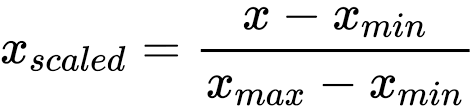

In [40]:
merged_df.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99,96369875,4.232766e+10,0.025207,4.972,10.820,0.000693
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87,98766288,4.886983e+10,0.024867,4.857,10.595,0.000710
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22,101194394,5.843486e+10,0.024584,4.746,10.367,0.000742
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90,103666904,8.359228e+10,0.024433,4.646,10.157,0.000791
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68,106167372,1.097945e+11,0.024120,4.502,9.954,0.000825


In [41]:
merged_df.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64')

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df)
scaled_df = pd.DataFrame(scaled_data, columns=merged_df.columns)
scaled_df.set_index(merged_df.index, inplace=True)

In [43]:
scaled_df

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
1970,0.003327,0.000000,0.000000,0.000000,0.000000,0.002654,0.395950,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
1971,0.000000,0.011833,0.000000,0.015970,0.020678,0.000000,0.412922,0.016081,0.020316,0.002542,0.982898,0.965476,0.952270,0.021140
1972,0.002086,0.025652,0.000000,0.040021,0.043352,0.036794,0.430713,0.040495,0.040901,0.006258,0.968709,0.932153,0.903903,0.061382
1973,0.012323,0.039761,0.000000,0.071865,0.078921,0.059575,0.422457,0.077235,0.061862,0.016032,0.961119,0.902131,0.859355,0.121171
1974,0.005838,0.051209,0.018204,0.097046,0.104355,0.119505,0.418894,0.101450,0.083060,0.026213,0.945394,0.858901,0.816292,0.164086
1975,0.003101,0.066872,0.054587,0.109863,0.118571,0.127578,0.393391,0.118878,0.104536,0.033754,0.932318,0.832783,0.771744,0.181052
1976,0.010838,0.079230,0.000000,0.136226,0.156579,0.146806,0.382735,0.141959,0.126459,0.043065,0.928808,0.809967,0.734408,0.209437
1977,0.018161,0.088076,0.066731,0.146384,0.188110,0.166490,0.332908,0.137131,0.148954,0.052069,0.931459,0.788352,0.697073,0.222345
1978,0.005483,0.102365,0.101102,0.168284,0.207114,0.241615,0.276470,0.164102,0.172051,0.061368,0.934919,0.766737,0.656979,0.260196
1979,0.024538,0.119715,0.003030,0.195318,0.234659,0.303454,0.292122,0.183840,0.195644,0.069550,0.932025,0.744221,0.611583,0.303896


### Running ARIMA

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [45]:
# Assuming you have a DataFrame named df with a target column
target='FINAL CONSUMPTION'


# Split data into train and test sets 
train_size = int(len(merged_df) * 0.80)
# data without scaling
#train, test = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

#data scaling:
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]


#X_train = train[FEATURES].values.reshape((-1, len(FEATURES), 1))
#X_test = test[FEATURES].values.reshape((-1, len(FEATURES), 1))

X_train = train[FEATURES]
X_test = test[FEATURES]
y_train=train[target]   
y_test=test[target]

combined_index = np.concatenate((train.index.values, test.index.values), axis=0)
combined_index
train

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
1970,0.003327,0.000000,0.000000,0.000000,0.000000,0.002654,0.395950,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
1971,0.000000,0.011833,0.000000,0.015970,0.020678,0.000000,0.412922,0.016081,0.020316,0.002542,0.982898,0.965476,0.952270,0.021140
1972,0.002086,0.025652,0.000000,0.040021,0.043352,0.036794,0.430713,0.040495,0.040901,0.006258,0.968709,0.932153,0.903903,0.061382
1973,0.012323,0.039761,0.000000,0.071865,0.078921,0.059575,0.422457,0.077235,0.061862,0.016032,0.961119,0.902131,0.859355,0.121171
1974,0.005838,0.051209,0.018204,0.097046,0.104355,0.119505,0.418894,0.101450,0.083060,0.026213,0.945394,0.858901,0.816292,0.164086
1975,0.003101,0.066872,0.054587,0.109863,0.118571,0.127578,0.393391,0.118878,0.104536,0.033754,0.932318,0.832783,0.771744,0.181052
1976,0.010838,0.079230,0.000000,0.136226,0.156579,0.146806,0.382735,0.141959,0.126459,0.043065,0.928808,0.809967,0.734408,0.209437
1977,0.018161,0.088076,0.066731,0.146384,0.188110,0.166490,0.332908,0.137131,0.148954,0.052069,0.931459,0.788352,0.697073,0.222345
1978,0.005483,0.102365,0.101102,0.168284,0.207114,0.241615,0.276470,0.164102,0.172051,0.061368,0.934919,0.766737,0.656979,0.260196
1979,0.024538,0.119715,0.003030,0.195318,0.234659,0.303454,0.292122,0.183840,0.195644,0.069550,0.932025,0.744221,0.611583,0.303896


In [46]:
# Split data into train and test sets 
train_size = int(len(scaled_df) * 0.80)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]  
X_train = train[FEATURES]
X_test = test[FEATURES]
y_train = train[target]   
y_test = test[target]

In [108]:
train.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
1970,0.003327,0.000000,0.000000,0.000000,0.000000,0.002654,0.395950,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
1971,0.000000,0.011833,0.000000,0.015970,0.020678,0.000000,0.412922,0.016081,0.020316,0.002542,0.982898,0.965476,0.952270,0.021140
1972,0.002086,0.025652,0.000000,0.040021,0.043352,0.036794,0.430713,0.040495,0.040901,0.006258,0.968709,0.932153,0.903903,0.061382
1973,0.012323,0.039761,0.000000,0.071865,0.078921,0.059575,0.422457,0.077235,0.061862,0.016032,0.961119,0.902131,0.859355,0.121171
1974,0.005838,0.051209,0.018204,0.097046,0.104355,0.119505,0.418894,0.101450,0.083060,0.026213,0.945394,0.858901,0.816292,0.164086


In [109]:
test.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
2011,0.778047,0.809269,0.0,0.871996,0.998598,0.509625,0.503872,0.823252,0.863162,1.000000,0.202400,0.047733,0.037548,0.831782
2012,0.817877,0.859794,0.0,0.955351,1.000000,1.000000,0.555601,0.900950,0.878357,0.941360,0.188080,0.037826,0.049639,0.898556
2013,0.848293,0.900620,0.0,0.977366,0.994092,0.965516,0.552796,0.957099,0.893143,0.944310,0.171865,0.032122,0.043275,0.963237
2014,0.913335,0.957938,0.0,1.000000,0.977202,0.944908,0.653243,1.000000,0.907876,0.937792,0.166539,0.037826,0.035214,1.000000
2015,0.939619,0.954206,0.0,0.970793,0.940170,0.894195,0.668889,0.969186,0.922531,0.683761,0.160539,0.040829,0.069368,0.948157


### Need to check PCAF, ACF to choose the right parameters

In [117]:
train.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,DEATH RATES PER 1000 PEOPLE,Consumo per capita energetico
1970,0.003327,0.000000,0.000000,0.000000,0.000000,0.002654,0.395950,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
1971,0.000000,0.011833,0.000000,0.015970,0.020678,0.000000,0.412922,0.016081,0.020316,0.002542,0.982898,0.965476,0.952270,0.021140
1972,0.002086,0.025652,0.000000,0.040021,0.043352,0.036794,0.430713,0.040495,0.040901,0.006258,0.968709,0.932153,0.903903,0.061382
1973,0.012323,0.039761,0.000000,0.071865,0.078921,0.059575,0.422457,0.077235,0.061862,0.016032,0.961119,0.902131,0.859355,0.121171
1974,0.005838,0.051209,0.018204,0.097046,0.104355,0.119505,0.418894,0.101450,0.083060,0.026213,0.945394,0.858901,0.816292,0.164086


In [4]:
train_cur=train[['AGRICULTURE, FISHING AND MINING']]

NameError: name 'train' is not defined

In [48]:
train_cur.head()

,"AGRICULTURE, FISHING AND MINING"
1970,0.003327
1971,0.000000
1972,0.002086
1973,0.012323
1974,0.005838


In [65]:
test_cur=test[['AGRICULTURE, FISHING AND MINING']]

### check stationary of the time series

In [49]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_cur)
print(f'p-value: {adf_test[1]}')

p-value: 1.0


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


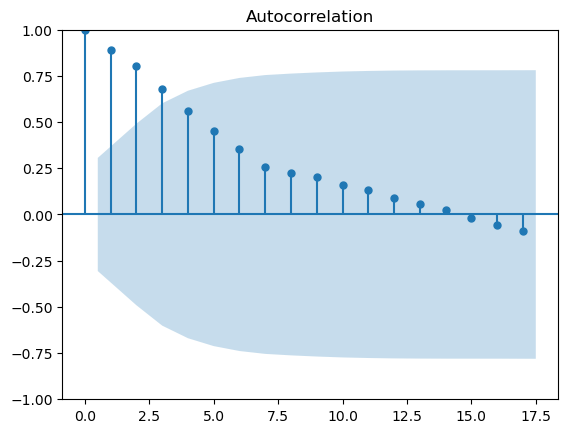

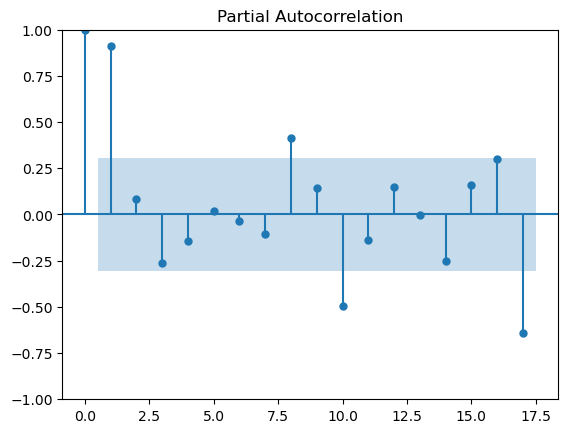

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_cur)

pacf_original = plot_pacf(train_cur)

## Transform to stationary: differencing
In some cases, we  might need to apply differencing to make a time series stationary.



In [3]:
train_diff = train_cur.diff().dropna()
train_diff.plot()

NameError: name 'train_cur' is not defined

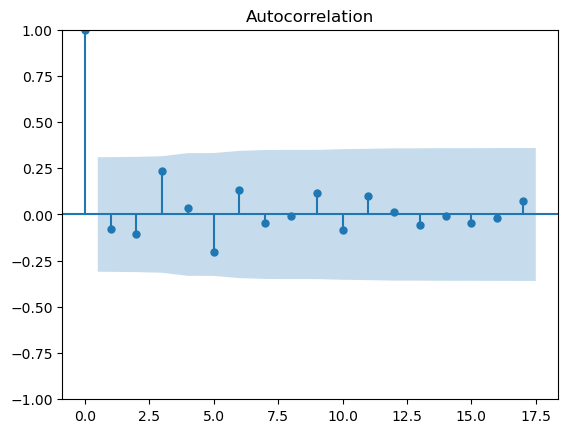

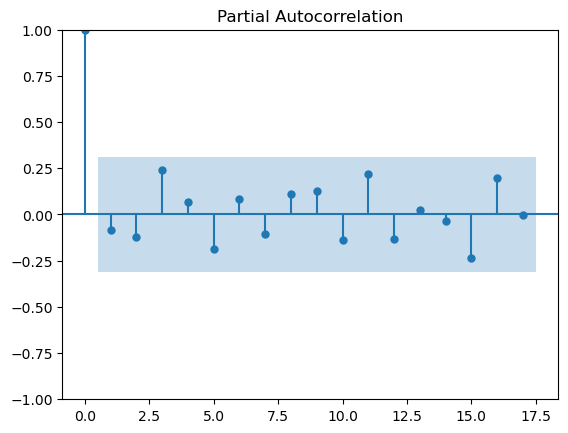

In [52]:
acf_diff = plot_acf(train_diff)

pacf_diff = plot_pacf(train_diff)

In [53]:
#check stationary of differencing now
#from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.8043542851060353e-08


### (2,1,1) is the best choice, based on PACF, ACF

In [54]:
#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_cur, order=(2,1,1)) #this combination is the best
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:     AGRICULTURE, FISHING AND MINING   No. Observations:                   41
Model:                              ARIMA(2, 1, 1)   Log Likelihood                  57.646
Date:                             Fri, 01 Sep 2023   AIC                           -107.292
Time:                                     14:34:07   BIC                           -100.537
Sample:                                          0   HQIC                          -104.849
                                              - 41                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8612      0.603      1.428      0.153      -0.321       2.043
ar.L2          0.1110      

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA par

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

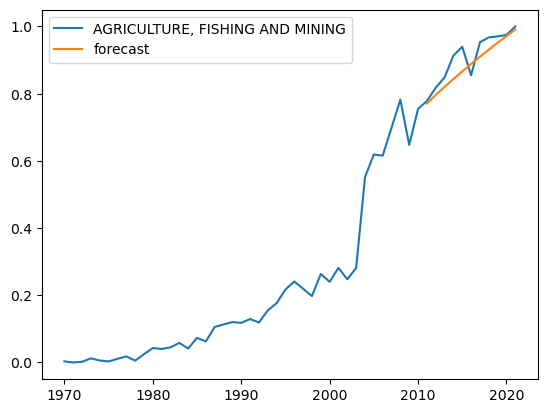

In [60]:
# prediction
forecast_test = model_fit.forecast(len(test_cur))

scaled_df['forecast'] = [None]*len(train_cur) + list(forecast_test)

scaled_df[['AGRICULTURE, FISHING AND MINING','forecast']].plot()

### check for different parameters

In [68]:
#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_cur, order=(5,1,0)) #this combination is the best
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:     AGRICULTURE, FISHING AND MINING   No. Observations:                   41
Model:                              ARIMA(5, 1, 0)   Log Likelihood                  59.473
Date:                             Fri, 01 Sep 2023   AIC                           -106.946
Time:                                     14:46:43   BIC                            -96.813
Sample:                                          0   HQIC                          -103.282
                                              - 41                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0369      0.157      0.235      0.814      -0.271       0.345
ar.L2         -0.0389      

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

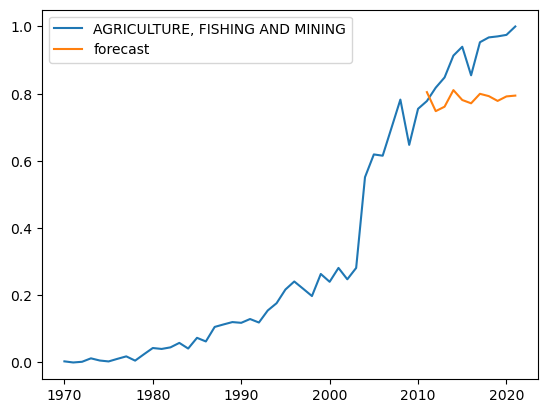

In [69]:
# prediction
forecast_test = model_fit.forecast(len(test_cur))

scaled_df['forecast'] = [None]*len(train_cur) + list(forecast_test)

scaled_df[['AGRICULTURE, FISHING AND MINING','forecast']].plot()

### Next research
* mutivariate VAR: 
* Kalman filter